# Laptop Price Prediction

## Problem Statement:
The increasing variety and complexity of laptops in the market make it challenging for consumers to estimate the fair market price for a given set of laptop specifications. This project aims to develop a predictive model that accurately estimates the price of a laptop based on various features and specifications.

## Evaluation Metrics:
The performance of the model will be assessed using appropriate regression metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. The chosen metrics will provide insights into the accuracy and reliability of the price predictions.

## Significance:
This project addresses the need for an accurate and accessible tool that assists consumers in estimating laptop prices, contributing to informed purchasing decisions in the competitive laptop market.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import io
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
%cd "Downloads"

C:\Users\zaida\Downloads


In [3]:
df = pd.read_csv("laptop_data.csv")

In [5]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# Cheacking fot nans
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [8]:
# Drop unnecessary column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# In Ram column i want to replace gb with nothing 
df["Ram"] = df.Ram.str.replace("GB","").astype(int)
df.Ram

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int32

In [11]:
# Removing Kgs in Weight column
df["Weight"] = df.Weight.str.replace("kg","").astype(float)
df.Weight

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


### Preprocessing & Visulaization

<Axes: xlabel='Price', ylabel='Density'>

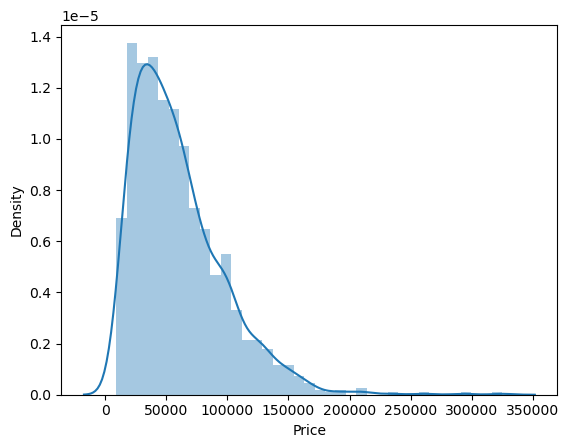

In [13]:
sns.distplot(df.Price)
# Data is skewed

<Axes: xlabel='Company'>

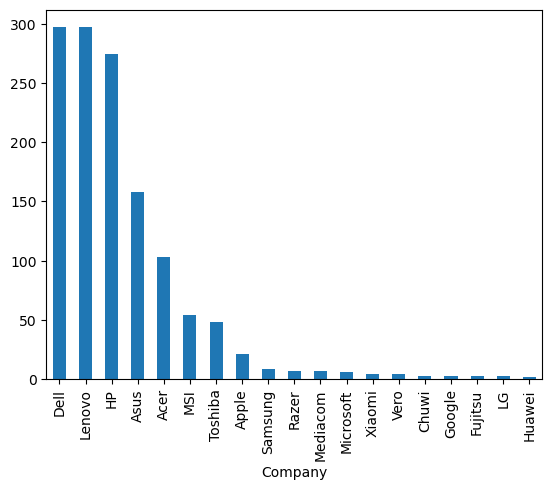

In [14]:
df.Company.value_counts().plot(kind="bar")

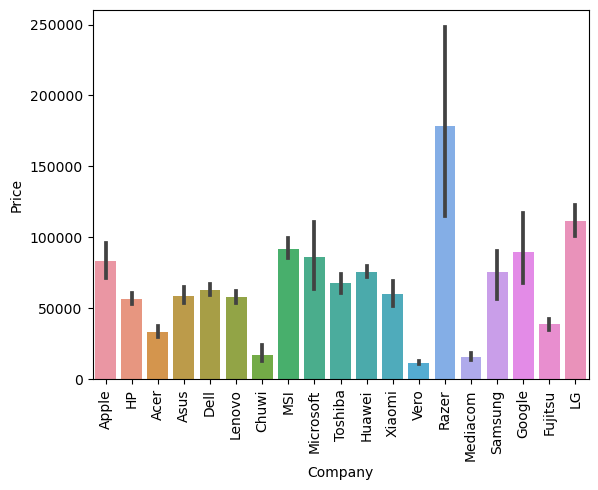

In [15]:
# To check that Company names are affect laptop price 
sns.barplot(x=df.Company , y=df.Price)
plt.xticks(rotation = "vertical")
plt.show()
# And Price of laptop are dependent on Company names

<Axes: xlabel='TypeName'>

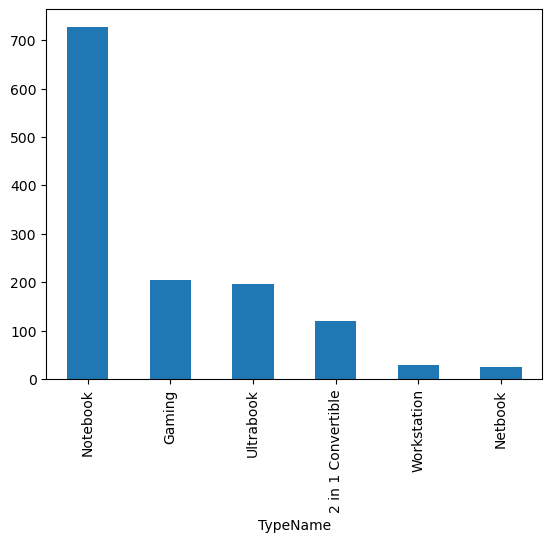

In [16]:
# Laptop Types
df["TypeName"].value_counts().plot(kind="bar")

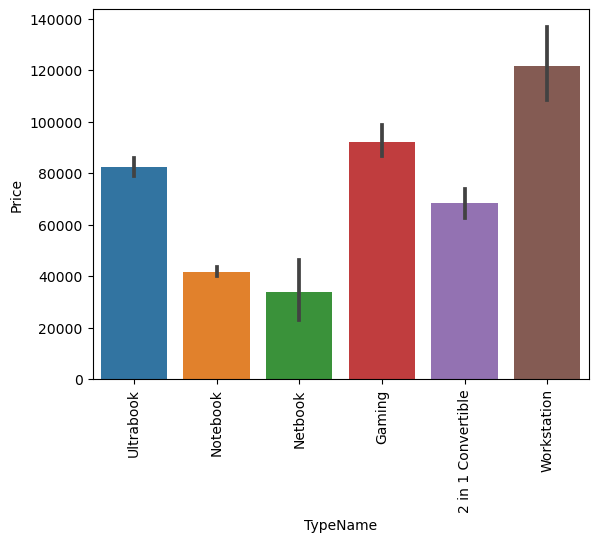

In [17]:
# Which type of laptop are expensive
sns.barplot(x=df.TypeName , y=df.Price)
plt.xticks(rotation = "vertical")
plt.show()


<Axes: xlabel='Inches', ylabel='Density'>

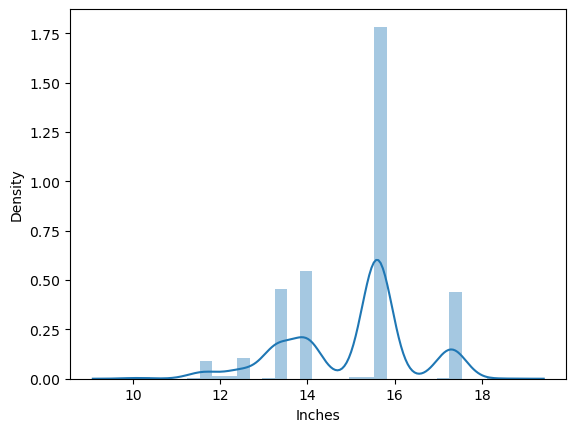

In [18]:
sns.distplot(df.Inches)

<Axes: xlabel='Inches', ylabel='Price'>

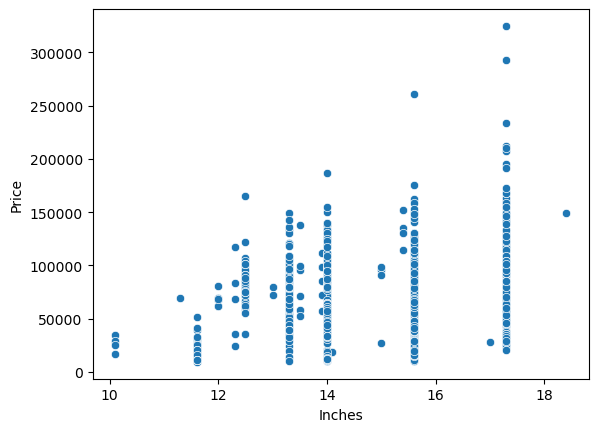

In [19]:
# As you can see as soon as the laptop size increases the price is also increasing
sns.scatterplot(x=df.Inches , y=df.Price)
# There is an relationship but not very strong

In [20]:
df.ScreenResolution.value_counts()
# So in this you can see important important features of the laptop are mixed up 
# eg :- Touchscreen , IPS , 4k etc

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [21]:
df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0 )

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1303, dtype: int64

In [22]:
# I will create a new column called Touchsccreen
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0 )
df.tail(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<Axes: xlabel='Touchscreen'>

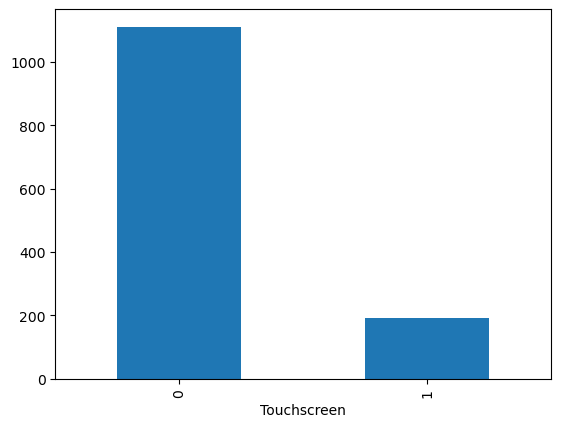

In [23]:
# Value Counts of touchscreen and non touchscreen
df.Touchscreen.value_counts().plot(kind="bar")

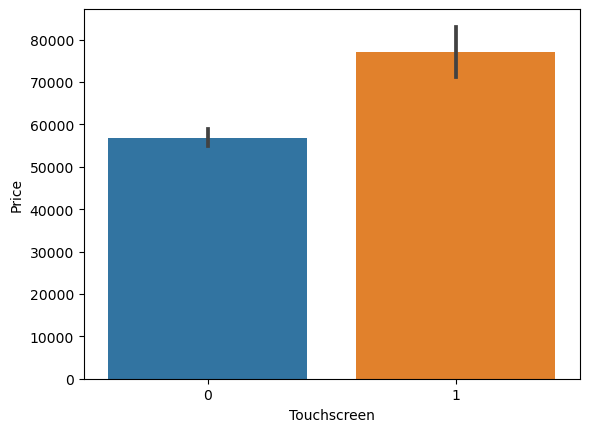

In [24]:
# Cheacking relationship of touchscreen and Price
sns.barplot(x=df.Touchscreen , y=df.Price)
plt.show()
# So you can see here the price of touchscreen laptops are high 
# So this column is important

In [25]:
# Same thing i will do with IPS
df["IPS"] = df["ScreenResolution"].apply(lambda x : 1 if "IPS" in x else 0)
df["IPS"]

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: IPS, Length: 1303, dtype: int64

<Axes: xlabel='IPS'>

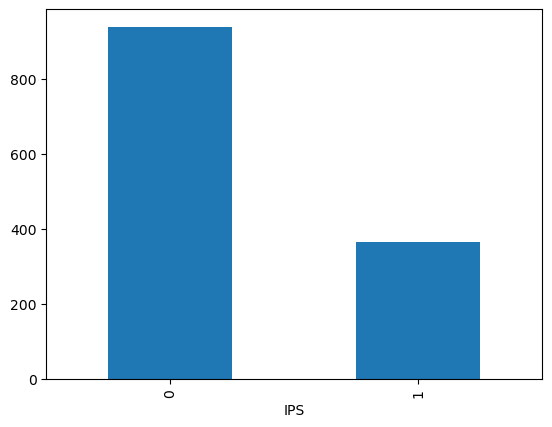

In [26]:
# Value Counts of IPS display laptaops and without IPS display laptops
df["IPS"].value_counts().plot(kind="bar")

<Axes: xlabel='IPS', ylabel='Price'>

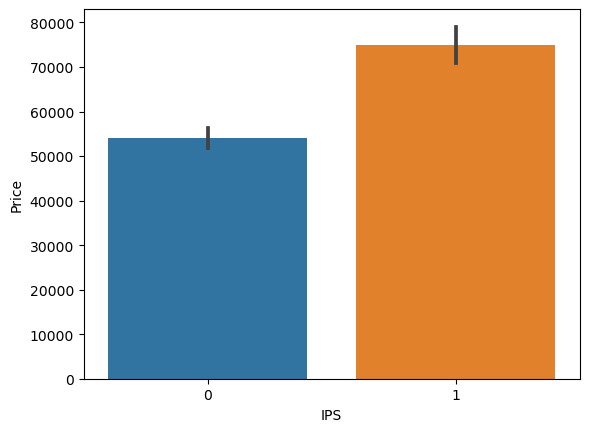

In [27]:
# Here also you can check laptops who has IPS display are little expensive
sns.barplot(x=df.IPS , y=df.Price)
# So this column is important

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [29]:
# So here what i want is to seprate Resolution from ScreenResolution column like this 2560 , 1600 in diffrent columns  

In [30]:
df["ScreenResolution"].str.split("x" , n=1 ,expand=True)
# So here as you can see i split my Screen resolution column on 'x' after this i used number of split parameter 
# expand :- This parameter is used to expand the result into separate columns. 
# When set to True, the result will be a DataFrame with each part of the split string in a separate column.

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [31]:
# after that i created a temprory column
tempdf = df["ScreenResolution"].str.split("x" , n=1 ,expand=True)
tempdf

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [32]:
df["X_Resolution"] = tempdf[0]
df["Y_Resolution"] = tempdf[1]

In [33]:
df.head()
# Here my Y_Resolution is okay but X_Resolution need to be filter

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [34]:
# i am using Regular expression
df["X_Resolution"] = df["X_Resolution"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])
df["X_Resolution"]
#This part uses the .findall() method with a regular expression (r'(\d+\.?\d+)').
# (\d+\.?\d+): This part captures one or more digits (\d+), optionally followed by a dot (\.?), and then followed by one or
# more digits again.This is used to extract numerical values from the string.

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_Resolution, Length: 1303, dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Resolution      1303 non-null   object 
 14  Y_Resolution      1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [36]:
df["X_Resolution"] = df["X_Resolution"].astype(int)
df["Y_Resolution"] = df["Y_Resolution"].astype(int)

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [38]:
df[["Inches","Ram","Weight","Price","Touchscreen","IPS","X_Resolution","Y_Resolution"]].corr()["Price"]
# cheking Correlation

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
Name: Price, dtype: float64

In [39]:
# So see there is very less correlation between Inches and Price 
# Here i can create a new column called "PPI"
# PPI stands for "Pixels Per Inch." It is a measure of the pixel density on a display, indicating how many pixels
# are packed into one inch of the screen.
# PPI is the square root of the sum of the squares of the horizontal and vertical pixel counts divided by the diagonal screen size.

### 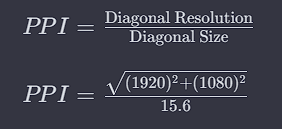

In [40]:
df["PPI"] = (((df["X_Resolution"]**2) + (df["Y_Resolution"]**2))**0.5/df["Inches"]).astype(float)

In [41]:
df.PPI

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1303, dtype: float64

In [42]:
df[["Inches","Ram","Weight","Price","Touchscreen","IPS","X_Resolution","Y_Resolution","PPI"]].corr()["Price"]
# PPI indicating strong corelation

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Resolution,Y_Resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [44]:
# So here i will drop unnecessary column 
df.drop(["ScreenResolution","Inches","X_Resolution","Y_Resolution"],axis=1,inplace=True)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [46]:
# Cheacking CPU value counts
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [47]:
# So here what i decided is to create 5 categories of CPU 
# Those categories will be ,
# 1)Intel Core i5 
# 2)Intel Core i3
# 3)Intel Core i7
# 4)Other intel processers like Xeom,Celerom,etc
# 5)AMD

In [48]:
# For this i will extract first 3 words
df["Cpu_name"] = df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [49]:
df.Cpu_name

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu_name, Length: 1303, dtype: object

In [50]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [51]:
# creating a finction
def processor(text):
    if text == "Intel Core i5" or text == "Intel Core i7" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [52]:
df["Cpu_name"].apply(processor)

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    Other Intel Processor
1301            Intel Core i7
1302    Other Intel Processor
Name: Cpu_name, Length: 1303, dtype: object

In [53]:
# Storing this in new column
df["CPU"] = df["Cpu_name"].apply(processor)

<Axes: xlabel='CPU'>

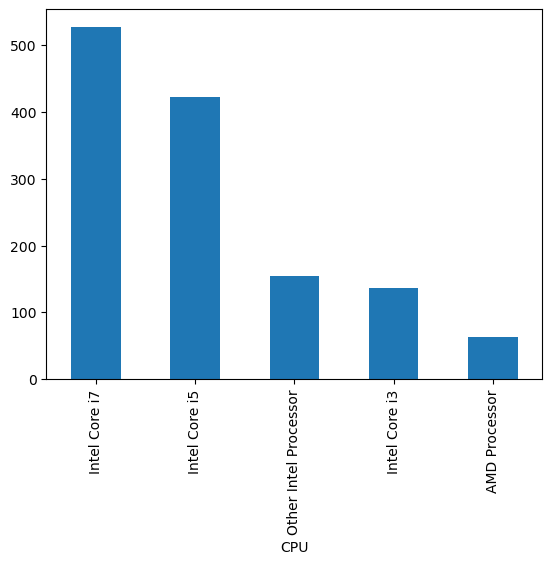

In [54]:
df["CPU"].value_counts().plot(kind="bar")

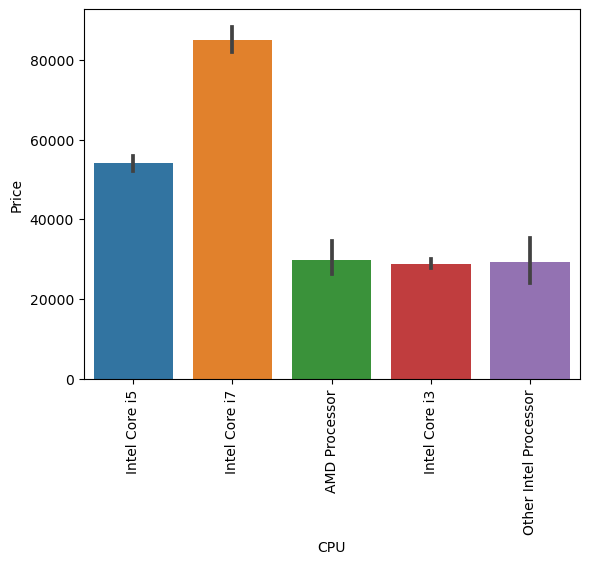

In [55]:
# Cheacking CPU relationship with Price
sns.barplot(x=df.CPU , y=df.Price)
plt.xticks(rotation="vertical")
plt.show()

In [56]:
df.head()
#droping unnecessary columns

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,CPU
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [57]:
df.drop(["Cpu","Cpu_name"],axis=1,inplace=True)

In [58]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU
344,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,84129.1200,0,0,165.632118,Intel Core i7
441,Dell,Notebook,4,256GB SSD,AMD Radeon 530,Windows 10,2.20,39906.7200,0,0,141.211998,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
975,HP,Notebook,8,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,52161.1200,0,1,141.211998,Intel Core i5
219,Dell,2 in 1 Convertible,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.62,68145.1200,1,0,165.632118,Intel Core i7


<Axes: xlabel='Ram'>

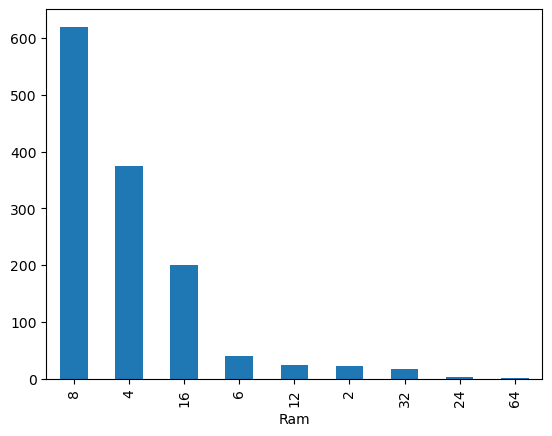

In [359]:
# Ram 
df["Ram"].value_counts().plot(kind="bar")

<Axes: xlabel='Ram', ylabel='Price'>

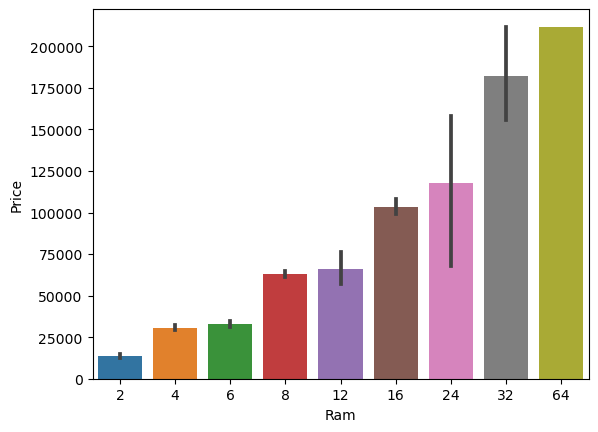

In [60]:
sns.barplot(x=df.Ram , y=df.Price)

In [61]:
# Memory
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [62]:
# Here in memory column there is an lot of categories are there 
# What i will do is converting whole column in 4 categories
# 1) SSD
# 2) HDD
# 3) Hybrid
# 4) Flash Storage

In [63]:
# removes the decimal point and zero (".0") from each string in the column.
df["Memory"] = df["Memory"].astype(str).replace("\.0","",regex=True)
df["Memory"]
# regex=True: This parameter indicates that the pattern provided is a regular expression. Since the pattern includes a dot (.),
# which has a special meaning in regular expressions, setting regex=True ensures that the dot is treated as a literal character.

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [64]:
# Replacing GB
df["Memory"] = df["Memory"].str.replace("GB","")
df["Memory"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301              1TB HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [65]:
# Replacing TB
df["Memory"] = df["Memory"].str.replace("TB","000")
df["Memory"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [66]:
# DataFrame called "new" with two columns containing the values obtained by splitting each 
# element in the "Memory" column at the first occurrence of "+".

new = df["Memory"].str.split("+",n=1,expand=True)
new.sample(5)

,0,1
1110,256 SSD,None
174,256 SSD,None
203,512 SSD,1000 HDD
504,16 SSD,None
1103,1000 HDD,None


In [67]:
df["First"] = new[0]
df["First"] = df["First"].str.strip()
# Strip():-The method returns a copy of the string with the leading and trailing whitespaces removed.

In [68]:
df["Second"] = new[1]

In [69]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,First,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None


In [70]:
df["Layer1HDD"] = df["First"].apply(lambda x:1 if "HDD" in x else 0)
df["Layer1SSD"] = df["First"].apply(lambda x:1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["First"].apply(lambda x:1 if "Hybrid" in x else 0)
df["Layer1Flash_storage"] = df["First"].apply(lambda x:1 if "Flash Storage" in x else 0)

In [71]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0


In [72]:
# Here i uses a regular expression to extract one or more digits (\d+) from each string.
df['First'] = df['First'].astype(str)
df["First"] = df['First'].str.extract(r'(\d+)')

In [73]:
# Cheacking nans
df["Second"].isna().sum()

1095

In [74]:
df["Second"].fillna("0",inplace = True)

In [75]:
df["Layer2HDD"] = df["Second"].apply(lambda x:1 if "HDD" in x else 0)
df["Layer2SSD"] = df["Second"].apply(lambda x:1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["Second"].apply(lambda x:1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["Second"].apply(lambda x:1 if "Flash Storage" in x else 0)

In [76]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0


In [77]:
# Here i uses a regular expression to extract one or more digits (\d+) from each string
df["Second"] = df["Second"].str.extract(r'(\d+)')
df["Second"]

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: Second, Length: 1303, dtype: object

In [78]:
# Changing DataType
df["First"] = df["First"].astype(int)
df["Second"] = df["Second"].astype(int)

In [79]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0


In [80]:
# Creating 4 new columns
df["HDD"]=(df["First"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["First"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["First"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["First"]*df["Layer1Flash_storage"]+df["Second"]*df["Layer2Flash_Storage"])

In [81]:
# Drop
df.drop(["First","Second","Layer1Hybrid","Layer1Flash_storage","Layer1SSD","Layer1HDD","Layer2HDD","Layer2SSD","Layer2Hybrid","Layer2Flash_Storage"],axis=1,inplace=True)

In [82]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage
1155,HP,Notebook,4,256 SSD,AMD Radeon 520,Windows 10,1.91,25515.2592,0,0,141.211998,AMD Processor,0,256,0,0
42,Asus,Notebook,8,1000 HDD,Nvidia GeForce 940MX,Linux,2.30,27864.9072,0,0,100.454670,Intel Core i5,1000,0,0,0
30,Chuwi,Notebook,4,64 Flash Storage,Intel HD Graphics,Windows 10,1.89,13053.0672,0,0,141.211998,Other Intel Processor,0,0,0,64
626,Mediacom,Notebook,2,32 Flash Storage,Intel HD Graphics,Windows 10,1.40,12733.9200,0,0,157.350512,Other Intel Processor,0,0,0,32
1174,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.20,37775.5200,0,0,141.211998,Intel Core i7,1000,0,0,0


In [83]:
df.drop("Memory",axis=1,inplace=True)

In [84]:
df[["Ram","Weight","Price","Touchscreen","IPS","PPI","HDD","SSD","Hybrid","Flash_Storage"]].corr()["Price"]
# cheking Correlation

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [85]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [86]:
# GPU
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [87]:
# In this case i dont have large dataset , so here i will take only company name 

In [88]:
df["GPU"] = df["Gpu"].apply(lambda x:x.split()[0])

In [89]:
df["GPU"].value_counts()

GPU
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [90]:
# So there is an only one laptop who has ARM GPU 
# I will drop this row 
df = df[df["GPU"]!="ARM"]

<Axes: xlabel='GPU'>

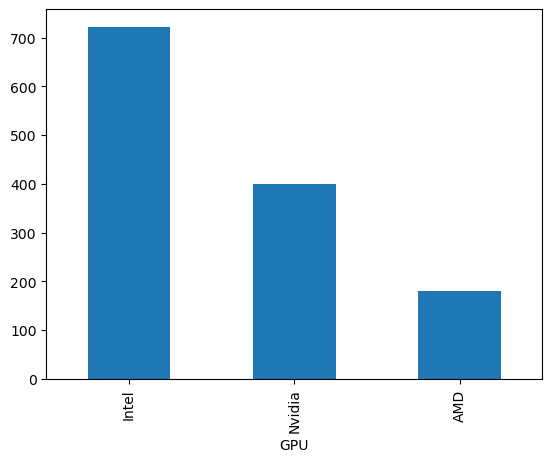

In [91]:
df["GPU"].value_counts().plot(kind="bar")

<Axes: xlabel='GPU', ylabel='Price'>

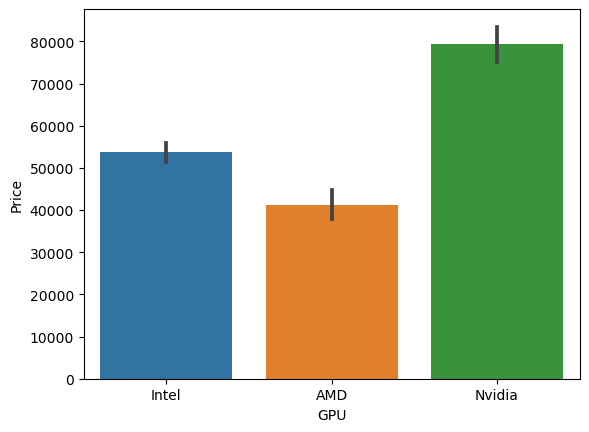

In [92]:
# Price analysis
sns.barplot(x=df.GPU , y=df.Price)

In [93]:
df.drop("Gpu",axis=1,inplace=True)

In [94]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage,GPU
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [95]:
# Opsys
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

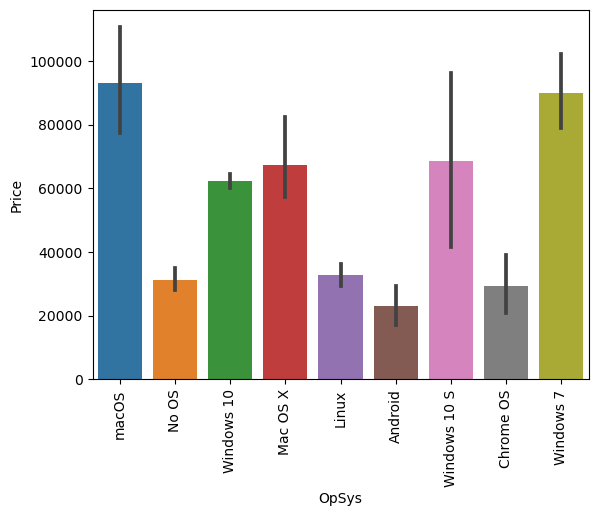

In [96]:
sns.barplot(x=df.OpSys , y=df.Price)
plt.xticks(rotation="vertical")
plt.show()

In [97]:
# Creating Categories of opsys column

In [98]:
def op(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    elif inp == "macOS" or inp == "Mac OS X":
        return "mac"
    else:
        return "No OS/Linux/Chrome OS/Android"

In [99]:
df["OS"] = df['OpSys'].apply(op)

In [100]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage,GPU,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No OS/Linux/Chrome OS/Android
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,mac


In [101]:
df.drop("OpSys",axis=1,inplace=True)

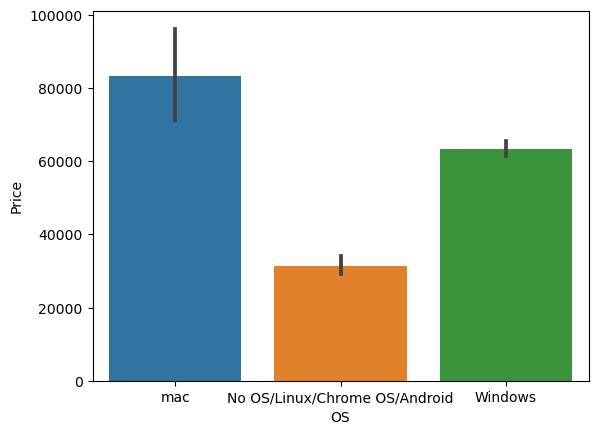

In [102]:
sns.barplot(x=df.OS , y=df.Price)
plt.show()

In [103]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage,GPU,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No OS/Linux/Chrome OS/Android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,mac


<Axes: xlabel='Weight', ylabel='Density'>

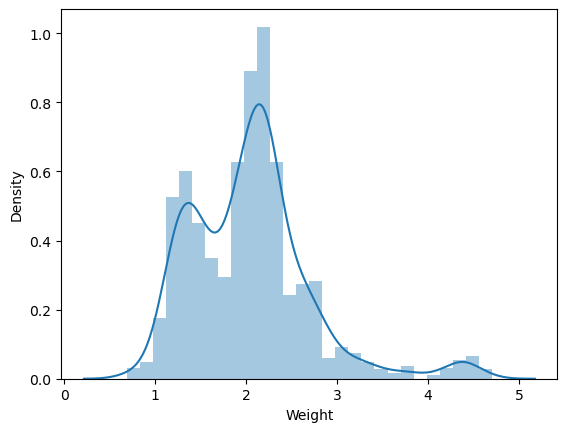

In [104]:
# Weight
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

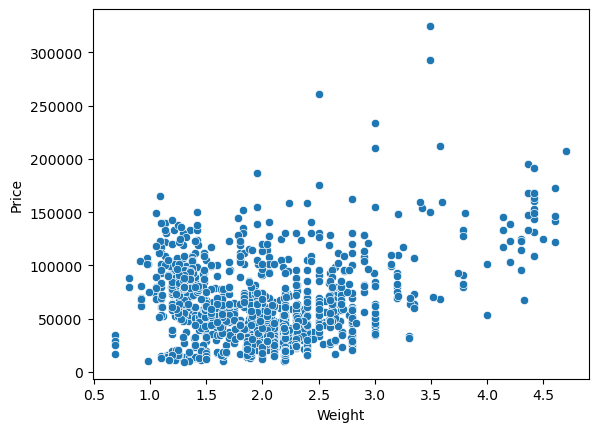

In [105]:
sns.scatterplot(x=df["Weight"] , y=df["Price"])

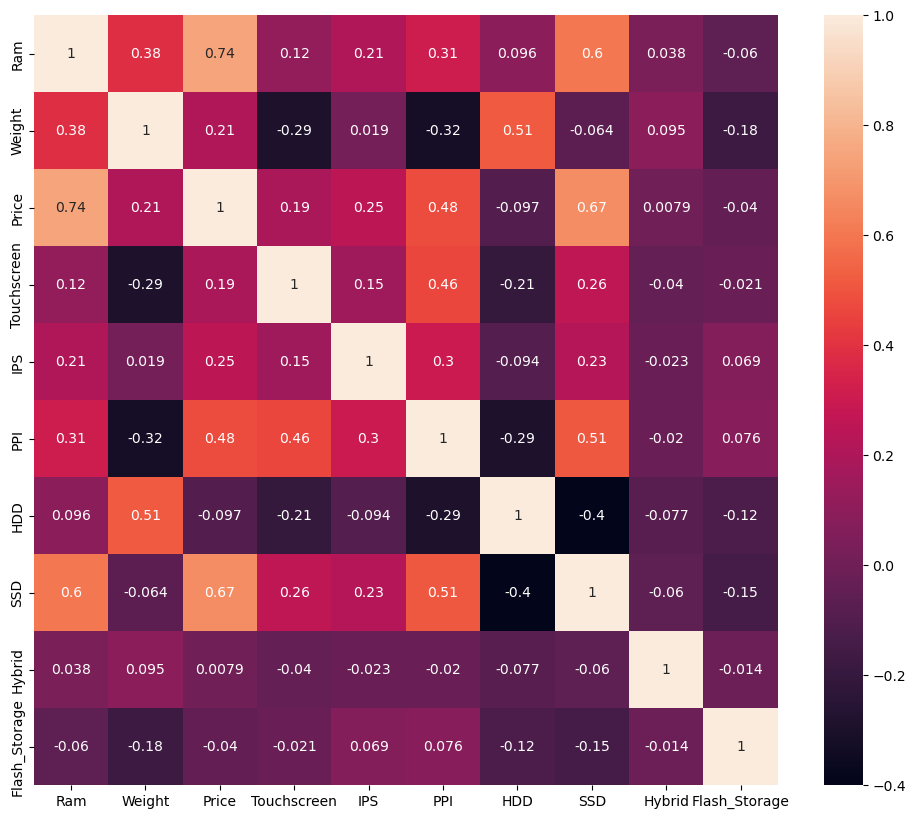

In [106]:
plt.figure(figsize=(12,10))
sns.heatmap(df[["Ram","Weight","Price","Touchscreen","IPS","PPI","HDD","SSD","Hybrid","Flash_Storage"]].corr(),annot=True)
plt.show()
# cheking Correlation

<Axes: xlabel='Price', ylabel='Density'>

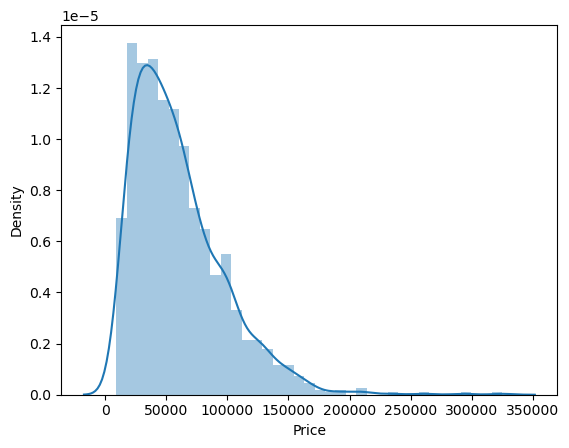

In [107]:
# So here you can see my target variable is skewed
sns.distplot(df.Price)

<Axes: xlabel='Price', ylabel='Density'>

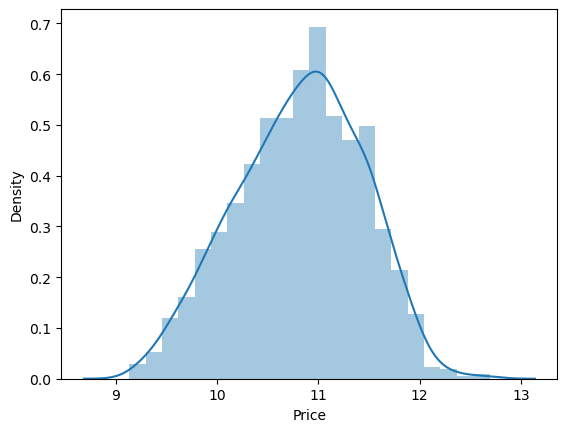

In [108]:
# Here my data is skewed so i will take log of Price
sns.distplot(np.log(df["Price"]))
# This applies the natural logarithm (base e) to each element in the "Price" column. 

# Hypothesis 

In [109]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage,GPU,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No OS/Linux/Chrome OS/Android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,mac


### Cheack the null hypothesis of average Price of diffrent TypeName is equal

In [110]:
np.round(df.Price.groupby(df.TypeName).mean(),2)
#Since more than 2 classes/groups/levels = Anova Single factor

TypeName
2 in 1 Convertible     68603.15
Gaming                 92247.96
Netbook                33898.44
Notebook               41669.15
Ultrabook              82489.71
Workstation           121497.53
Name: Price, dtype: float64

In [111]:
# Split Data
Convertible = df[df.TypeName == "2 in 1 Convertible"]
Gaming = df[df.TypeName == "Gaming"]
Netbook = df[df.TypeName == "Netbook"]
Notebook = df[df.TypeName == "Notebook"]
Ultrabook = df[df.TypeName == "Ultrabook"]
Workstation = df[df.TypeName == "Workstation"]

In [112]:
from scipy.stats import f_oneway

In [113]:
f_oneway(Convertible.Price , Gaming.Price , Netbook.Price , Notebook.Price , Ultrabook.Price , Workstation.Price)
# Since pvalue=2.4561945615567407e-133 less than 0.05 , Reject null

F_onewayResult(statistic=161.175904173529, pvalue=2.4561945615567407e-133)

### Cheack null hypothesis weight of diffrent typeName is equal

In [114]:
np.round(df.Weight.groupby(df.TypeName).mean(),2)

TypeName
2 in 1 Convertible    1.55
Gaming                2.95
Netbook               1.31
Notebook              2.06
Ultrabook             1.34
Workstation           2.47
Name: Weight, dtype: float64

In [115]:
f_oneway(Convertible.Weight , Gaming.Weight , Netbook.Weight , Notebook.Weight , Ultrabook.Weight , Workstation.Weight)
# Since pvalue=2.0599512074122088e-217 is less than 0.05 , Reject Null 

F_onewayResult(statistic=307.99716705765763, pvalue=2.0599512074122088e-217)

### Cheack the null hypothesis of average Price of Touchsccreen and non-Touchscreen laptop is equal

In [116]:
np.round(df.Price.groupby(df.Touchscreen).mean(),2)
# Since exactly 2 levels/groups/classes - 2 Sample Independent T Test

Touchscreen
0    56910.52
1    77214.49
Name: Price, dtype: float64

In [117]:
#Variance
np.round(df.Price.groupby(df.Touchscreen).var(),2)
# This calculates the variance of the "Price" values within each group. 

Touchscreen
0    1.270123e+09
1    1.727937e+09
Name: Price, dtype: float64

In [118]:
Touch = df[df.Touchscreen == 1]
non_touch = df[df.Touchscreen == 0]

In [119]:
from scipy.stats import ttest_ind

In [120]:
ttest_ind(Touch.Price , non_touch.Price , equal_var=False)
# Since pvalue=1.0051223367182836e-09 is less than 0.05 , Reject Null

TtestResult(statistic=6.36053441433747, pvalue=1.0051223367182836e-09, df=240.39683079727627)

### Cheack the null hypothesis of average Price of IPS and non-IPS laptop is equal

In [121]:
np.round(df.Price.groupby(df.IPS).mean(),2)
# Since exactly 2 levels/groups/classes - 2 Sample Independent T Test

IPS
0    54012.93
1    75031.39
Name: Price, dtype: float64

In [122]:
#Variance
np.round(df.Price.groupby(df.IPS).var(),2)
# This calculates the variance of the "Price" values within each group. 

IPS
0    1.229954e+09
1    1.479386e+09
Name: Price, dtype: float64

In [123]:
ips = df[df.IPS == 1]
non_ips = df[df.IPS == 0]

In [124]:
ttest_ind(ips.Price , non_ips.Price , equal_var=False)
# Since pvalue=1.6757101155798132e-18 is less than 0.05 , Reject Null

TtestResult(statistic=9.065493915569116, pvalue=1.6757101155798132e-18, df=610.4003464550767)

### Cheack the null hypothesis of average price of diffrent OS is equal

In [125]:
np.round(df.Price.groupby(df.OS).mean(),2)
#Since more than 2 classes/groups/levels = Anova Single factor

OS
No OS/Linux/Chrome OS/Android    31496.78
Windows                          63388.36
mac                              83340.50
Name: Price, dtype: float64

In [126]:
# Split Data
Others = df[df["OS"] == "No OS/Linux/Chrome OS/Android"]
window = df[df["OS"] == "Windows"] 
MAC = df[df["OS"] == "mac"]

In [127]:
f_oneway(Others.Price , window.Price , MAC.Price)
# Since pvalue=2.228297587117939e-25 is less than 0.05 , Reject Null

F_onewayResult(statistic=59.317688746749894, pvalue=2.228297587117939e-25)

### Cheack the null hypothesis of average price of diffrent CPU is equal

In [128]:
np.round(df.Price.groupby(df.CPU).mean(),2)
#Since more than 2 classes/groups/levels = Anova Single factor

CPU
AMD Processor            29870.84
Intel Core i3            28857.83
Intel Core i5            54080.01
Intel Core i7            85023.11
Other Intel Processor    29323.85
Name: Price, dtype: float64

In [129]:
# Split Data
amd = df[df["CPU"] == "AMD Processor"]
i3 = df[df["CPU"] == "Intel Core i3"] 
i5 = df[df["CPU"] == "Intel Core i5"]
i7 = df[df["CPU"] == "Intel Core i7"]
others = df[df["CPU"] == "Other Intel Processor"]

In [130]:
f_oneway(amd.Price , i3.Price , i5.Price , i7.Price , others.Price)
# Since pvalue=6.227281658392934e-131 is less than 0.05 , Reject NUll 

F_onewayResult(statistic=194.9594400013507, pvalue=6.227281658392934e-131)

### Cheack the null hypothesis of average price of diffrent GPU is equal

In [131]:
np.round(df.Price.groupby(df.GPU).mean(),2)
#Since more than 2 classes/groups/levels = Anova Single factor

GPU
AMD       41326.51
Intel     53718.26
Nvidia    79380.50
Name: Price, dtype: float64

In [132]:
# Split Data
amd = df[df["GPU"] == "AMD"]
intel = df[df["GPU"] == "Intel"] 
nvi = df[df["GPU"] == "Nvidia"]

In [133]:
f_oneway(amd.Price , intel.Price , nvi.Price)
# Since pvalue=6.227281658392934e-131 is less than 0.05 , Reject NUll 

F_onewayResult(statistic=100.2923312573136, pvalue=3.133182493816303e-41)

### Test
### Null :- There is no assocication between Price and TypeName
### Alt  :- There is an association between Price and TypeName

In [134]:
from scipy.stats import chi2_contingency

In [135]:
chi2_contingency(pd.crosstab(df.Price,df.TypeName))
# Again pvalue=2.0009964518012447e-14 is less than 0.05 , Reject null

Chi2ContingencyResult(statistic=4659.936849911951, pvalue=2.0009964518012447e-14, dof=3950, expected_freq=array([[0.0921659 , 0.15745008, 0.01920123, 0.55837174, 0.15053763,
        0.02227343],
       [0.0921659 , 0.15745008, 0.01920123, 0.55837174, 0.15053763,
        0.02227343],
       [0.0921659 , 0.15745008, 0.01920123, 0.55837174, 0.15053763,
        0.02227343],
       ...,
       [0.0921659 , 0.15745008, 0.01920123, 0.55837174, 0.15053763,
        0.02227343],
       [0.0921659 , 0.15745008, 0.01920123, 0.55837174, 0.15053763,
        0.02227343],
       [0.0921659 , 0.15745008, 0.01920123, 0.55837174, 0.15053763,
        0.02227343]]))

### Test
### Null :- There is no assocication between Price and Ram
### Alt  :- There is an association between Price and Ram

In [136]:
chi2_contingency(pd.crosstab(df.Price,df.Ram))
# Again pvalue=7.993372984582493e-29 is less than 0.05 , Reject null

Chi2ContingencyResult(statistic=7647.893376200725, pvalue=7.993372984582493e-29, dof=6320, expected_freq=array([[0.01689708, 0.28725038, 0.03149002, ..., 0.00230415, 0.01305684,
        0.00076805],
       [0.01689708, 0.28725038, 0.03149002, ..., 0.00230415, 0.01305684,
        0.00076805],
       [0.01689708, 0.28725038, 0.03149002, ..., 0.00230415, 0.01305684,
        0.00076805],
       ...,
       [0.01689708, 0.28725038, 0.03149002, ..., 0.00230415, 0.01305684,
        0.00076805],
       [0.01689708, 0.28725038, 0.03149002, ..., 0.00230415, 0.01305684,
        0.00076805],
       [0.01689708, 0.28725038, 0.03149002, ..., 0.00230415, 0.01305684,
        0.00076805]]))

### Test
### Null :- There is no assocication between TypeName and Ram
### Alt  :- There is an association between TypeName and Ram

In [137]:
chi2_contingency(pd.crosstab(df.TypeName,df.Ram))
# Again pvalue=4.994749378032359e-100 is less than 0.05 , Reject null

Chi2ContingencyResult(statistic=595.1897989785926, pvalue=4.994749378032359e-100, dof=40, expected_freq=array([[2.02764977e+00, 3.44700461e+01, 3.77880184e+00, 5.70506912e+01,
        2.30414747e+00, 1.84331797e+01, 2.76497696e-01, 1.56682028e+00,
        9.21658986e-02],
       [3.46390169e+00, 5.88863287e+01, 6.45545315e+00, 9.74615975e+01,
        3.93625192e+00, 3.14900154e+01, 4.72350230e-01, 2.67665131e+00,
        1.57450077e-01],
       [4.22427035e-01, 7.18125960e+00, 7.87250384e-01, 1.18855607e+01,
        4.80030722e-01, 3.84024578e+00, 5.76036866e-02, 3.26420891e-01,
        1.92012289e-02],
       [1.22841782e+01, 2.08831029e+02, 2.28932412e+01, 3.45632104e+02,
        1.39592934e+01, 1.11674347e+02, 1.67511521e+00, 9.49231951e+00,
        5.58371736e-01],
       [3.31182796e+00, 5.63010753e+01, 6.17204301e+00, 9.31827957e+01,
        3.76344086e+00, 3.01075269e+01, 4.51612903e-01, 2.55913978e+00,
        1.50537634e-01],
       [4.90015361e-01, 8.33026114e+00, 9.13210445e

### Test
### Null :- There is no assocication between Price and Weight
### Alt  :- There is an association between Price and Weight

In [138]:
chi2_contingency(pd.crosstab(df.Price,df.Weight))
# Since pvalue=0.00013396016637894927 less than 0.05 , Reject null

Chi2ContingencyResult(statistic=136197.01070216426, pvalue=0.00013396016637894927, dof=134300, expected_freq=array([[0.0030722 , 0.0015361 , 0.00076805, ..., 0.00076805, 0.0030722 ,
        0.00076805],
       [0.0030722 , 0.0015361 , 0.00076805, ..., 0.00076805, 0.0030722 ,
        0.00076805],
       [0.0030722 , 0.0015361 , 0.00076805, ..., 0.00076805, 0.0030722 ,
        0.00076805],
       ...,
       [0.0030722 , 0.0015361 , 0.00076805, ..., 0.00076805, 0.0030722 ,
        0.00076805],
       [0.0030722 , 0.0015361 , 0.00076805, ..., 0.00076805, 0.0030722 ,
        0.00076805],
       [0.0030722 , 0.0015361 , 0.00076805, ..., 0.00076805, 0.0030722 ,
        0.00076805]]))

### Test
### Null :- There is no assocication between Price and OS
### Alt  :- There is an association between Price and OS

In [139]:
chi2_contingency(pd.crosstab(df.Price,df.OS))
# Since pvalue=1.8191314548014221e-09 less than 0.05 , Reject null

Chi2ContingencyResult(statistic=1934.504916883117, pvalue=1.8191314548014221e-09, dof=1580, expected_freq=array([[0.11981567, 0.8640553 , 0.01612903],
       [0.11981567, 0.8640553 , 0.01612903],
       [0.11981567, 0.8640553 , 0.01612903],
       ...,
       [0.11981567, 0.8640553 , 0.01612903],
       [0.11981567, 0.8640553 , 0.01612903],
       [0.11981567, 0.8640553 , 0.01612903]]))

### Test
### Null :- There is no assocication between Typename and Touchscreen
### Alt  :- There is an association between Typename and Touchscreen

In [140]:
chi2_contingency(pd.crosstab(df.TypeName,df.Touchscreen))
# Since pvalue=3.831950504737505e-169 less than 0.05 , Reject null

Chi2ContingencyResult(statistic=792.9731359734759, pvalue=3.831950504737505e-169, dof=5, expected_freq=array([[102.39631336,  17.60368664],
       [174.92703533,  30.07296467],
       [ 21.33256528,   3.66743472],
       [620.35099846, 106.64900154],
       [167.24731183,  28.75268817],
       [ 24.74577573,   4.25422427]]))

In [141]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage,GPU,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No OS/Linux/Chrome OS/Android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,mac


### Encoding

In [142]:
# Here i used Ordinal encoder instead of onehotencoder or getdummies because i have very less data if i used those two,
# they will create a lot of columns and my prediction will get affected

In [143]:
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
ordd = o.fit_transform(df[["Company"]])
df["Company"] = ordd.astype(int)
df.Company

0        1
1        1
2        7
3        1
4        1
        ..
1298    10
1299    10
1300    10
1301     7
1302     2
Name: Company, Length: 1302, dtype: int32

In [144]:
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
ordd = o.fit_transform(df[["TypeName"]])
df["TypeName"] = ordd.astype(int)
df.TypeName

0       4
1       4
2       3
3       4
4       4
       ..
1298    0
1299    0
1300    3
1301    3
1302    3
Name: TypeName, Length: 1302, dtype: int32

In [145]:
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
ordd = o.fit_transform(df[["CPU"]])
df["CPU"] = ordd.astype(int)
df.CPU

0       2
1       2
2       2
3       3
4       2
       ..
1298    3
1299    3
1300    4
1301    3
1302    4
Name: CPU, Length: 1302, dtype: int32

In [146]:
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
ordd = o.fit_transform(df[["GPU"]])
df["GPU"] = ordd.astype(int)
df.GPU

0       1
1       1
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    0
1302    1
Name: GPU, Length: 1302, dtype: int32

In [147]:
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
ordd = o.fit_transform(df[["OS"]])
df["OS"] = ordd.astype(int)
df.OS

0       2
1       2
2       0
3       2
4       2
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: OS, Length: 1302, dtype: int32

In [148]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage,GPU,OS
0,1,4,8,1.37,71378.6832,0,1,226.983005,2,0,128,0,0,1,2
1,1,4,8,1.34,47895.5232,0,0,127.677940,2,0,0,0,128,1,2
2,7,3,8,1.86,30636.0000,0,0,141.211998,2,0,256,0,0,1,0
3,1,4,16,1.83,135195.3360,0,1,220.534624,3,0,512,0,0,0,2
4,1,4,8,1.37,96095.8080,0,1,226.983005,2,0,256,0,0,1,2


### Splitting

In [149]:
X = df.drop("Price",axis=1)
y = np.log(df["Price"])

In [150]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage,GPU,OS
0,1,4,8,1.37,0,1,226.983005,2,0,128,0,0,1,2
1,1,4,8,1.34,0,0,127.677940,2,0,0,0,128,1,2
2,7,3,8,1.86,0,0,141.211998,2,0,256,0,0,1,0
3,1,4,16,1.83,0,1,220.534624,3,0,512,0,0,0,2
4,1,4,8,1.37,0,1,226.983005,2,0,256,0,0,1,2


In [151]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.15)

In [154]:
Xtrain.shape

(1106, 14)

In [155]:
Xtest.shape

(196, 14)

## Model Building

### Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [157]:
linear.fit(Xtrain,ytrain)

LinearRegression()

In [158]:
# Training score
linear.score(Xtrain,ytrain)

0.6637326906246968

In [159]:
# Testing score
linear.score(Xtest,ytest)

0.6786976533513126

### Ridge

In [160]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=10)
R.fit(Xtrain,ytrain)

Ridge(alpha=10)

In [161]:
R.score(Xtrain,ytrain)

0.6635004154848392

In [162]:
R.score(Xtest,ytest)

0.6787376375878916

### Lasso

In [163]:
from sklearn.linear_model import Lasso
L = Lasso(alpha=0.001)
L.fit(Xtrain,ytrain)

Lasso(alpha=0.001)

In [164]:
# Trianing score
L.score(Xtrain,ytrain)

0.6636074948532775

In [165]:
# Testing score
L.score(Xtest,ytest)

0.6793695456586385

### KNN

In [166]:
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors=3)
Knn.fit(Xtrain,ytrain)

KNeighborsRegressor(n_neighbors=3)

In [167]:
# Training score
Knn.score(Xtrain,ytrain)

0.8957831273918141

In [168]:
# Testing score
Knn.score(Xtest,ytest)

0.8274781551006651

### SVM

In [169]:
from sklearn.svm import SVR
svm = SVR(kernel="rbf" , C=1000 , epsilon=0.1)
svm.fit(Xtrain,ytrain)

SVR(C=1000)

In [170]:
# Trainig score
svm.score(Xtrain,ytrain)

0.791222131925229

In [171]:
# Testing score
svm.score(Xtest,ytest)

0.7845731634843213

### Decision Tree

In [172]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8)
dt.fit(Xtrain,ytrain)

DecisionTreeRegressor(max_depth=8)

In [173]:
# Training score
dt.score(Xtrain,ytrain)

0.9046399040722863

In [174]:
# Testing score
dt.score(Xtest,ytest)

0.806274187283166

### Random Forest

##### Hyperparameter Tunnig

In [175]:
from sklearn.model_selection import cross_val_score , GridSearchCV ,RandomizedSearchCV

In [176]:
dic = { "n_estimators":[50,100,150,200,250],
        'random_state': [3,4,5,6,8],
        "max_features": [0.5,0.85,0.75,1.0],
        "max_samples":[0.5,0.7,1.0,0.4],
        "max_depth" : [15,20,25,10]
         }

In [177]:
dic

{'n_estimators': [50, 100, 150, 200, 250],
 'random_state': [3, 4, 5, 6, 8],
 'max_features': [0.5, 0.85, 0.75, 1.0],
 'max_samples': [0.5, 0.7, 1.0, 0.4],
 'max_depth': [15, 20, 25, 10]}

In [178]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()

In [179]:
gscv = GridSearchCV(rf1, param_grid=dic, cv=10, n_jobs=-1)

In [180]:
gscv.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 10],
                         'max_features': [0.5, 0.85, 0.75, 1.0],
                         'max_samples': [0.5, 0.7, 1.0, 0.4],
                         'n_estimators': [50, 100, 150, 200, 250],
                         'random_state': [3, 4, 5, 6, 8]})

In [181]:
gscv.best_score_

0.8715663416061666

In [182]:
gscv.best_params_

{'max_depth': 20,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 150,
 'random_state': 6}

In [183]:
rf = RandomForestRegressor(n_estimators=150,random_state=3,max_samples=1.0,max_features=0.5,max_depth=20)
rf.fit(Xtrain,ytrain)

RandomForestRegressor(max_depth=20, max_features=0.5, max_samples=1.0,
                      n_estimators=150, random_state=3)

In [184]:
# training score
rf.score(Xtrain,ytrain)

0.9797028616772592

In [185]:
# Testing score
rf.score(Xtest,ytest)

0.9041934941962909

In [ ]:
# You can see my random forest model is getting 90% accuracy

### Ada boost

##### Hyperparameterm Tunnig 

In [186]:
dic = { "n_estimators" : [15,20,30,40,50,60],
        "learning_rate" : [1.0,2.0,3.0,0.5,1.5],
        "random_state" : [20,40,45,50,55,60]
      }
dic

{'n_estimators': [15, 20, 30, 40, 50, 60],
 'learning_rate': [1.0, 2.0, 3.0, 0.5, 1.5],
 'random_state': [20, 40, 45, 50, 55, 60]}

In [188]:
from sklearn.ensemble import AdaBoostRegressor
ada1 = AdaBoostRegressor()

In [189]:
GS = GridSearchCV(ada1, param_grid=dic, cv=10)

In [190]:
GS.fit(X,y)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1.0, 2.0, 3.0, 0.5, 1.5],
                         'n_estimators': [15, 20, 30, 40, 50, 60],
                         'random_state': [20, 40, 45, 50, 55, 60]})

In [191]:
GS.best_score_

0.7903119270309934

In [192]:
GS.best_params_

{'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 60}

In [193]:
ada = AdaBoostRegressor(n_estimators=50 , learning_rate=1.0, random_state=60)
ada.fit(Xtrain,ytrain)

AdaBoostRegressor(random_state=60)

In [194]:
# Training score
ada.score(Xtrain,ytrain)

0.8236161696753748

In [195]:
# Testing score
ada.score(Xtest,ytest)

0.8232327927408942

### Gradiant Boosting

##### hyper parameter tunnnig

In [196]:
dic = { "n_estimators" : [200,300,500,600],
        "learning_rate" : [0.1,0.5,1.0,1.5],
      }
dic

{'n_estimators': [200, 300, 500, 600], 'learning_rate': [0.1, 0.5, 1.0, 1.5]}

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
gr1 = GradientBoostingRegressor()

In [198]:
ngs = GridSearchCV(gr1, param_grid=dic)

In [199]:
ngs.fit(X,y)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [200, 300, 500, 600]})

In [200]:
ngs.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [201]:
ngs.best_score_

0.8734674924961935

In [202]:
gb = GradientBoostingRegressor(n_estimators=500)
gb.fit(Xtrain,ytrain)

GradientBoostingRegressor(n_estimators=500)

In [203]:
# Traninng score
gb.score(Xtrain,ytrain)

0.9586792675642605

In [204]:
# Testing score
gb.score(Xtest,ytest)

0.8966603259426267

### XG Boost

#### Hyperparameter tunning

In [205]:
dic = {
        "n_estimators" : [200,300,500,600],
        "learning_rate" : [0.1,0.5,1.0,1.5],
        "max_depth" : [6,7,8,9,10,13],
        "colsample_bytree" : [1.0,1.5,2,2.5],
        "lambda" : [1,3,5,7,2]
}
dic

{'n_estimators': [200, 300, 500, 600],
 'learning_rate': [0.1, 0.5, 1.0, 1.5],
 'max_depth': [6, 7, 8, 9, 10, 13],
 'colsample_bytree': [1.0, 1.5, 2, 2.5],
 'lambda': [1, 3, 5, 7, 2]}

In [207]:
from xgboost import XGBRegressor
xg1 = XGBRegressor()
CV = GridSearchCV(xg1, param_grid=dic ,cv=10)

In [208]:
CV.fit(X,y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [1.0, 1.5, 2, 2.5],
                         'lambda': [1, 3, 5, 7, 2],
                         'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'max_depth': [6, 7, 8, 9, 10, 13],
                         'n_estimators': [200, 300, 500, 600]})

In [209]:
CV.best_score_

0.8747691068719657

In [210]:
CV.best_params_

{'colsample_bytree': 1.0,
 'lambda': 2,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200}

In [211]:
xgb = XGBRegressor(colsample_bytree=1.0, n_estimators=200, max_depth=6, learning_rate=0.1,lambda_=2)
xgb.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_=2, learning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [212]:
# Training score 
xgb.score(Xtrain,ytrain)

0.9812325973039177

In [213]:
# Testing score
xgb.score(Xtest,ytest)

0.9081586404464729

### Evalution Metrics 


#### Gradiant Boosting

In [323]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
ypred = gb.predict(Xtest)

In [325]:
print("MAE = ",mean_absolute_error(ytest,ypred))

MAE =  0.14292641671388265


In [326]:
print("MSE = ", mean_squared_error(ytest,ypred))

MSE =  0.03783052504076438


In [324]:
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))

RMSE =  0.19450070704438166


In [327]:
r2 = (r2_score(ytest,ypred))
r2

0.8966603259426267

# 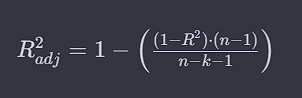

In [328]:
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(df)-1))/(len(df)-14-1)))

Adjusted R2 Score =  0.8955361958441005


#### Random  Forest

In [356]:
ypred = rf.predict(Xtest)

In [329]:
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))

RMSE =  0.18727730077931498


In [330]:
print("MAE = ",mean_absolute_error(ytest,ypred))

MAE =  0.13816616557055583


In [331]:
print("MSE = ", mean_squared_error(ytest,ypred))

MSE =  0.035072787387186014


In [332]:
r2 = (r2_score(ytest,ypred))
r2

0.9041934941962909

In [333]:
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(df)-1))/(len(df)-14-1)))

Adjusted R2 Score =  0.903151309983974


#### XGBoost

In [349]:
ypred = xgb.predict(Xtest)

In [348]:
print("MAE = ",mean_absolute_error(ytest,ypred))

MAE =  0.1350491131716384


In [334]:
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))

RMSE =  0.18336092566035253


In [336]:
print("MSE = ", mean_squared_error(ytest,ypred))

MSE =  0.03362122905902133


In [337]:
r2 = (r2_score(ytest,ypred))
r2 

0.9081586404464729

In [338]:
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(df)-1))/(len(df)-14-1)))

Adjusted R2 Score =  0.9071595891381983


#### AdaBoost

In [350]:
ypred = ada.predict(Xtest)

In [352]:
print("MAE = ",mean_absolute_error(ytest,ypred))

MAE =  0.20854838301094936


In [351]:
print("RMSE = ",np.sqrt((mean_squared_error(ytest,ypred))))

RMSE =  0.2543832379420625


In [353]:
print("MSE = ", mean_squared_error(ytest,ypred))

MSE =  0.064710831745888


In [354]:
r2 = (r2_score(ytest,ypred))
r2 

0.8232327927408942

In [355]:
print("Adjusted R2 Score = ", 1-(((1-r2)*(len(df)-1))/(len(df)-14-1)))

Adjusted R2 Score =  0.821309917137454


## Conclusion

# 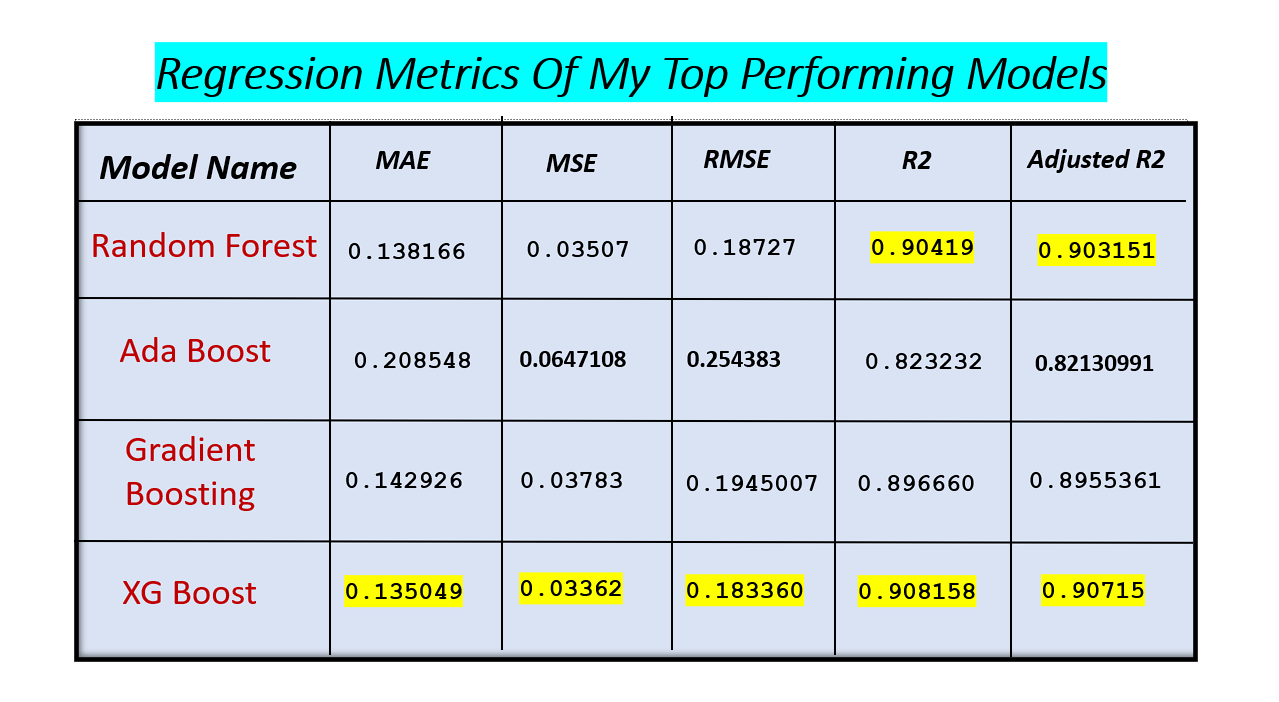